<a href="https://colab.research.google.com/github/MelloWill36/Python_Para_Analise_Dados/blob/main/scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 from sklearn.preprocessing import LabelEncoder
 from sklearn.linear_model import LogisticRegression
 from sklearn.linear_model import LinearRegression

## Classificação

In [2]:
# Coleta de Dados
df = pd.read_csv('https://pycourse.s3.amazonaws.com/temperature.csv')

In [3]:
# Define a coluna date como index
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

In [4]:
# Definição do X e Y
x, y = df[['temperatura']].values, df[['classification']].values
print('x = ', x)
print('y = ', y)

x =  [[29.1]
 [31.2]
 [28.5]
 [28. ]
 [24. ]
 [20. ]]
y =  [['quente']
 ['muito quente']
 ['quente']
 ['quente']
 ['confortavel']
 ['frio']]


In [5]:
# conversão de Y para valores numericos
le = LabelEncoder()
y = le.fit_transform(y.ravel())
print('y = ', y)

y =  [3 2 3 3 0 1]


In [6]:
# Classificador
clf = LogisticRegression()
clf.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
# gerando 100 valores de temperaturas
x_test = np.linspace(start = 0., stop = 45., num = 100).reshape(-1,1)

# predição de x_test
y_pred = clf.predict(x_test)

In [8]:
# conversão dos valores y_test pro valor original
y_pred = le.inverse_transform(y_pred)

In [9]:
# saida
saida = {
    'new_temp': x_test.ravel(),
    'new_class': y_pred.ravel()
}
df_saida = pd.DataFrame(saida)

In [10]:
df_saida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   new_temp   100 non-null    float64
 1   new_class  100 non-null    object 
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [11]:
df_saida.describe()

,new_temp
count,100.000000
mean,22.500000
std,13.187042
min,0.000000
25%,11.250000
50%,22.500000
75%,33.750000
max,45.000000


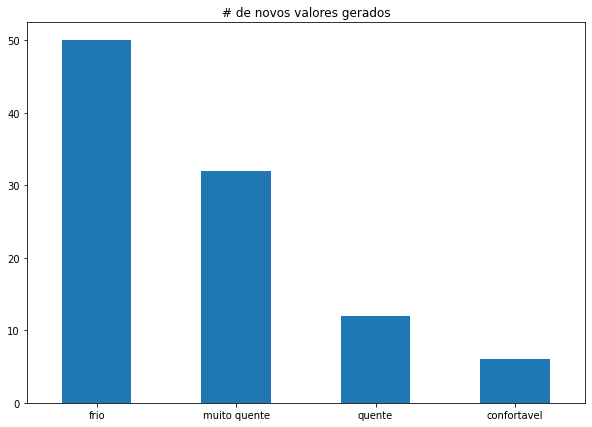

In [12]:
# contagem dos valores gerados
df_saida['new_class'].value_counts().plot.bar(
    figsize = (10,7),
    rot = 0,
    title = '# de novos valores gerados'
)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


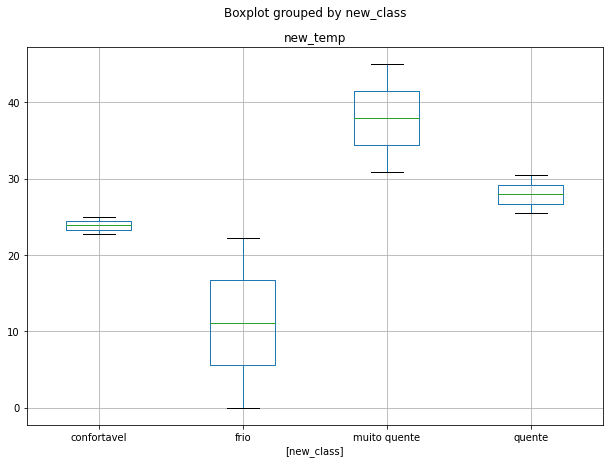

In [13]:
# boxplot
df_saida.boxplot(by = 'new_class', figsize = (10,7))

In [14]:
# Sistema Automatico
def classify_temp():
    ask = True
    while ask:
        temp = float(input('Insira a temperatura'))
        temp = np.array(temp).reshape(-1,1)
        class_temp = clf.predict(temp)
        class_temp = le.inverse_transform(class_temp)
        print(f'A classificação da temperatura {temp.ravel()[0]} é: {class_temp[0]}')
        ask = input('Nova Classificação (y/n): ') == 'y'

In [ ]:
# chamando a sistema automatico
classify_temp()

## Regressão Linear

In [ ]:
# dados
x = [-1, -0.77777778, -0.555555559, -0.33333333, -0.1111111111, 0.11111111111, 0.3333333333, 0.555555555, 0.777777778, 1]
y = [-1.111189389, -0.55859058, -0.2098098, 0.54495884, 0.4993839, 1.1429048, 1.6409090, 2.13434234, 2.6434333, 2.95334342]

In [ ]:
# plot dos dados
plt.figure(figsize = (10, 5))
plt.plot(x, y, 'o', label = 'Dados Originais')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [ ]:
# tranformando para numpy arraye vetor coluna
x, y = np.array(x).reshape(-1,1), np.array(y).reshape(-1,1)

# modelo
reg = LinearRegression()
reg.fit(x, y)

In [ ]:
# valor estimado de a e b
print('a = ', reg.coef_.ravel()[0])
print('b = ', reg.intercept_[0])

In [ ]:
# predição do modelo
y_pred = reg.predict(x)

In [ ]:
# score do modelo
print('score = ', reg.score(x,y))